In [9]:
import numpy as np
import pandas as pd

In [10]:
data = pd.read_csv('credit_train.csv', encoding='cp1251', sep=';')
# готовим некоторые данные
data['score_shk'] = data['score_shk'].str.replace(',','.').astype(float)
data['credit_sum'] = data['credit_sum'].str.replace(',','.').astype(float)
# преобразуем указанные переменные в тип object
for i in ['tariff_id', 'open_account_flg']:
    data[i] = data[i].astype('object')
data['living_region'] = data['living_region'].astype(str)
from_replace = ['\s?(ОБЛАСТЬ|ОБЛ\.|ОБЛ|КРАЙ\.|КРАЙ|РЕСПУБЛИКА|РЕСП\.|РЕСП|Г\.\s|Г\s|\sГ|АО|Р-Н)\s?', '74',
                '98|САНКТ-ПЕТЕРБУРГ', 'ЕВРЕЙСКАЯБЛ', 'КАМЧАТСКАЯ|КАМЧАТС\?\?ИЙ', '(МОСКВА|МОСКВОСКАЯ|МЫТИЩИНСКИЙ)',
                '(САХА \(ЯКУТИЯ\)|САХА \/ЯКУТИЯ\/)', 'СЕВ\. ОСЕТИЯ - АЛАНИЯ', 'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУ- ЮГРА',
                'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУ- Ю', '(ЧУВАШИЯ\sЧУВАШСКАЯ-|ЧУВАШСКАЯ\s?-\sЧУВАШИЯ)', 'БЛ ЕВРЕЙСКАЯ', 
                'БРЯНСКИЙ', 'ГОРЬКОВСКАЯ', 'ОРЁЛ', 'ПЕРМСКАЯ', 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ', 'ЭВЕНКИЙСКИЙ', 
                'nan|ГУСЬ-ХРУСТАЛЬНЫЙ|МОСКОВСКИЙ\sП|РОССИЯ', 'ХАНТЫ-МАНСИЙСКИЙ-ЮГРА', 'ЧЕЛЯБИНСК$', 'ЧИТИНСКАЯ',
                'ЧУКОТСКИЙ\sАO', 'Г.МОСКОВСКАЯ', 'Г.ОДИНЦОВО\sМОСКОВСКАЯ', 'ДАЛЬНИЙ\sВОСТОК']
to_replace = ['', 'ЧЕЛЯБИНСКАЯ', 'ЛЕНИНГРАДСКАЯ', 'ЕВРЕЙСКАЯ АВТОНОМНАЯ',
              'КАМЧАТСКИЙ', 'МОСКОВСКАЯ', 'САХА', 'СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ',
              'ХАНТЫ-МАНСИЙСКИЙ', 'ХАНТЫ-МАНСИЙСКИЙ', 'ЧУВАШСКАЯ', 'ЕВРЕЙСКАЯ АВТОНОМНАЯ',
              'БРЯНСКАЯ', 'НИЖЕГОРОДСКАЯ', 'ОРЛОВСКАЯ', 'ПЕРМСКИЙ', 'МОСКОВСКАЯ', 'КРАСНОЯРСКИЙ', 
              'МОСКОВСКАЯ', 'ХАНТЫ-МАНСИЙСКИЙ', 'ЧЕЛЯБИНСКАЯ', 'ЗАБАЙКАЛЬСКИЙ', 'ЧУКОТСКИЙ', 
              'МОСКОВСКАЯ', 'МОСКОВСКАЯ', 'ПРИМОРСКИЙ']
data['living_region'].replace(from_replace, to_replace, regex=True, inplace=True)
    
    
data.at[data['job_position'] == 'PNV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'PNS', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'HSK', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'INV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'ONB', 'job_position'] = 'OTHER'
data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 55, 
         'tariff_id'] = '1.99'
    
region_series = data['living_region'].value_counts()
mask = (region_series/region_series.sum() * 100).lt(0.029)
data['living_region'] = np.where(data['living_region'].isin(region_series[mask].index), 
                                 'OTHER', data['living_region'])
data['age'].fillna(data['age'].median(), inplace=True)
for i in ['credit_sum', 'score_shk']:
    data[i].fillna(data[i].median(), inplace=True)
data['monthly_income'].fillna(30000.0, inplace=True)
for i in ['credit_count', 'overdue_credit_count']:
    data[i].fillna(-1, inplace=True)
data['marital_status'] = data['marital_status'].fillna('MAR')
data['education'].fillna(data['education'].value_counts().index[0], inplace=True)
data['tariff'] = data['tariff_id'].astype('float')

In [11]:
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff
0,1,M,34.0,MAR,UMN,59998.00,10,1.6,0.461599,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0,1.6
1,2,F,34.0,MAR,UMN,10889.00,6,1.1,0.461599,SCH,МОСКОВСКАЯ,30000.0,2.0,0.0,0,1.1
2,3,M,32.0,MAR,SPC,10728.00,12,1.1,0.461599,SCH,САРАТОВСКАЯ,30000.0,5.0,0.0,0,1.1
3,4,F,27.0,MAR,SPC,12009.09,12,1.1,0.461599,SCH,ВОЛГОГРАДСКАЯ,30000.0,2.0,0.0,0,1.1
4,5,M,45.0,MAR,SPC,21229.00,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,30000.0,1.0,0.0,0,1.1


In [12]:
# импортируем класс LabelEncoder
from sklearn.preprocessing import LabelEncoder
# создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder()
data['job_position'] = label_encoder.fit_transform(data['job_position'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['education'] = label_encoder.fit_transform(data['education'])
data['living_region'] = label_encoder.fit_transform(data['living_region'])
data.drop(['client_id'], axis = 1)
data.drop(['tariff_id'], axis = 1)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff
0,1,1,34.0,2,10,59998.00,10,0.461599,1,31,30000.0,1.0,1.0,0,1.60
1,2,0,34.0,2,10,10889.00,6,0.461599,3,40,30000.0,2.0,0.0,0,1.10
2,3,1,32.0,2,9,10728.00,12,0.461599,3,56,30000.0,5.0,0.0,0,1.10
3,4,0,27.0,2,9,12009.09,12,0.461599,3,12,30000.0,2.0,0.0,0,1.10
4,5,1,45.0,2,9,21229.00,10,0.421385,3,77,30000.0,1.0,0.0,0,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,0,27.0,3,9,64867.00,12,0.535257,1,64,40000.0,6.0,0.0,0,1.10
170742,170743,0,24.0,2,9,17640.00,6,0.573287,3,35,30000.0,1.0,0.0,0,1.60
170743,170744,0,31.0,3,9,27556.47,10,0.416098,1,51,40000.0,1.0,0.0,0,1.32
170744,170745,0,53.0,1,7,6189.00,12,0.482595,3,49,31000.0,2.0,0.0,0,1.10


In [13]:
data['target'] = data['open_account_flg']
data.drop(['open_account_flg'], axis = 1)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,tariff,target
0,1,1,34.0,2,10,59998.00,10,1.6,0.461599,1,31,30000.0,1.0,1.0,1.60,0
1,2,0,34.0,2,10,10889.00,6,1.1,0.461599,3,40,30000.0,2.0,0.0,1.10,0
2,3,1,32.0,2,9,10728.00,12,1.1,0.461599,3,56,30000.0,5.0,0.0,1.10,0
3,4,0,27.0,2,9,12009.09,12,1.1,0.461599,3,12,30000.0,2.0,0.0,1.10,0
4,5,1,45.0,2,9,21229.00,10,1.1,0.421385,3,77,30000.0,1.0,0.0,1.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,0,27.0,3,9,64867.00,12,1.1,0.535257,1,64,40000.0,6.0,0.0,1.10,0
170742,170743,0,24.0,2,9,17640.00,6,1.6,0.573287,3,35,30000.0,1.0,0.0,1.60,0
170743,170744,0,31.0,3,9,27556.47,10,1.32,0.416098,1,51,40000.0,1.0,0.0,1.32,0
170744,170745,0,53.0,1,7,6189.00,12,1.1,0.482595,3,49,31000.0,2.0,0.0,1.10,0


In [15]:
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,target
0,1,1,34.0,2,10,59998.00,10,1.6,0.461599,1,31,30000.0,1.0,1.0,0,1.6,0
1,2,0,34.0,2,10,10889.00,6,1.1,0.461599,3,40,30000.0,2.0,0.0,0,1.1,0
2,3,1,32.0,2,9,10728.00,12,1.1,0.461599,3,56,30000.0,5.0,0.0,0,1.1,0
3,4,0,27.0,2,9,12009.09,12,1.1,0.461599,3,12,30000.0,2.0,0.0,0,1.1,0
4,5,1,45.0,2,9,21229.00,10,1.1,0.421385,3,77,30000.0,1.0,0.0,0,1.1,0


In [16]:
data.drop(['open_account_flg'], axis = 1)

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,tariff,target
0,1,1,34.0,2,10,59998.00,10,1.6,0.461599,1,31,30000.0,1.0,1.0,1.60,0
1,2,0,34.0,2,10,10889.00,6,1.1,0.461599,3,40,30000.0,2.0,0.0,1.10,0
2,3,1,32.0,2,9,10728.00,12,1.1,0.461599,3,56,30000.0,5.0,0.0,1.10,0
3,4,0,27.0,2,9,12009.09,12,1.1,0.461599,3,12,30000.0,2.0,0.0,1.10,0
4,5,1,45.0,2,9,21229.00,10,1.1,0.421385,3,77,30000.0,1.0,0.0,1.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170741,170742,0,27.0,3,9,64867.00,12,1.1,0.535257,1,64,40000.0,6.0,0.0,1.10,0
170742,170743,0,24.0,2,9,17640.00,6,1.6,0.573287,3,35,30000.0,1.0,0.0,1.60,0
170743,170744,0,31.0,3,9,27556.47,10,1.32,0.416098,1,51,40000.0,1.0,0.0,1.32,0
170744,170745,0,53.0,1,7,6189.00,12,1.1,0.482595,3,49,31000.0,2.0,0.0,1.10,0


In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC,SVC
from sklearn import preprocessing

In [18]:
x = data.drop(['target'],axis = 1 )
y = data.loc[:, 'target']
x = StandardScaler().fit_transform(x)

In [19]:
x

array([[-1.73204066,  1.0397234 , -0.23679458, ...,  3.22312221,
        -0.46220429,  1.16740642],
       [-1.73202038, -0.96179426, -0.23679458, ...,  0.03342027,
        -0.46220429, -0.94921355],
       [-1.73200009,  1.0397234 , -0.42644128, ...,  0.03342027,
        -0.46220429, -0.94921355],
       ...,
       [ 1.73200009, -0.96179426, -0.52126463, ...,  0.03342027,
        -0.46220429, -0.01790076],
       [ 1.73202038, -0.96179426,  1.56484905, ...,  0.03342027,
        -0.46220429, -0.94921355],
       [ 1.73204066,  1.0397234 ,  1.18555565, ...,  0.03342027,
        -0.46220429, -0.94921355]])

In [26]:
model = PCA()
results = model.fit(x) 

In [27]:
Z = results.transform(x)

In [28]:
Z = results.transform(x) # результат преобразуется в массив для использования вновь созданных данных

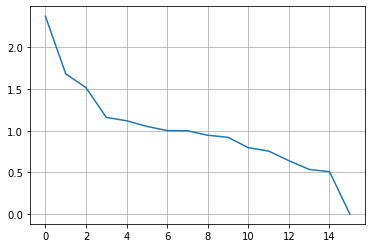

In [30]:
import matplotlib.pyplot as plt
plt.plot(results.explained_variance_)#график каменистой осыпи
plt.grid()
plt.show()

In [32]:
PCA_data = pd.DataFrame(Z)
PCA_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.314801,2.448506,-0.461874,-0.545325,-0.008039,-1.390190,0.930406,-1.587089,0.182985,-0.124982,-0.555357,-0.534548,-2.175225,-2.317601,-0.428398,-5.551115e-16
1,-1.078153,-1.410215,-0.919249,-0.771875,0.529410,-0.423537,1.254879,-1.205923,0.133944,-0.291455,-0.459924,1.302925,0.204956,0.078399,0.210671,-1.110223e-16
2,-1.307636,-0.302257,-0.595966,1.037312,0.422684,-1.113555,1.684450,-0.756407,0.586519,-0.833709,-0.449273,-0.328775,1.024475,0.693274,-0.559656,-5.551115e-16
3,-1.010094,-1.163986,-0.336900,-0.251609,-0.821007,-0.453652,0.396486,-2.104475,0.494902,-0.334363,-0.999672,0.578881,0.612183,0.193496,0.682787,1.110223e-16
4,-1.240567,-0.769926,-0.112659,0.438352,0.799866,0.037456,2.358371,-0.017097,0.791014,-1.016782,0.612149,-0.175857,-0.538211,-0.267372,-0.213234,-7.771561e-16


In [33]:
PCA_data = pd.concat([PCA_data, data['target']], axis = 1) # сконкатенируем наши главные компоненты с таргетом

In [34]:
test_K_means = PCA_data.sample(frac=0.2, random_state=200) # возьмём 20 % от всех данных для кластеризации

In [47]:
from sklearn.cluster import KMeans 
X = test_K_means.drop(['target'], axis =1 )
y = test_K_means.target

In [48]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(test_K_means)

In [51]:
kmeans.fit(X[y])

MemoryError: Unable to allocate 8.69 GiB for an array with shape (34149, 34149) and data type float64

In [40]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(test_K_means)
print(kmeans.labels_)

[3 7 0 ... 4 3 3]


In [41]:
kmeans.cluster_centers_

array([[-4.03248468e-01,  1.15959430e+00,  9.76756375e-01,
         1.00288951e+00, -2.88294829e+00, -3.14989145e-01,
         1.40558323e-01,  1.57127374e-01,  7.58387541e-01,
        -3.32463748e-02,  3.28822837e-01, -1.43880324e+00,
         3.76790378e-01,  1.16212728e-01,  5.78126845e-01,
        -2.59968465e-16,  2.03204661e-01],
       [-6.18509271e-01, -5.84759600e-01, -1.05324336e-01,
         1.10407373e+00,  1.73210857e-01, -2.58426336e-01,
         4.47438871e-02,  1.53848556e-02, -6.37997012e-01,
         1.61126040e+00,  2.12516000e-01,  8.97863293e-02,
        -2.17662446e-01, -2.75670302e-01,  1.54770188e-02,
         2.83119344e-17,  1.00000000e+00],
       [-2.62485849e-01,  9.98326905e-01,  2.76280088e-01,
         1.08736358e+00,  5.67535498e-01,  2.66804831e+00,
        -2.08505930e-01, -2.02977547e-01, -6.45369353e-01,
        -5.64037186e-01, -1.19260176e+00, -4.12896516e-01,
         2.12989845e-01, -9.29662968e-02, -4.53355138e-02,
         7.85759418e-16,  1.9